## Topic Modeling
In this project we will segment the headlines from ABC for 15 years. The project has some sample data of 20K headlines. However the full dataset is available for the practice and further research. The objective is to identify the possible segments and optimize the K value. Subsequently visualize the segments/clusters formed by the segmentation.

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
#Read headlines data
data = pd.read_csv("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\news_headlines.csv")
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data.head()

,Unnamed: 0,publish_date,headline_text
0,355023,20080106,kibaki offers unified kenyan govt
1,508861,20091223,gp deregistered over depression prescriptions
2,374650,20080404,opposition wants more protection for indigenous
3,958559,20150608,queens birthday honours recognise country
4,549951,20100712,smith wont commit to second term ets


In [3]:
dataSample = data.sample(7500)
dataSample.head()

,Unnamed: 0,publish_date,headline_text
13618,749966,20121218,'roadmap' for domestic violence victims
4506,605420,20110405,act govt welcomes jail audit
15950,900517,20140829,sustainability group warns against cutting
1051,726491,20120921,anti bullying campaign attracts huge support
3463,662710,20111228,police concerned over missing man


In [4]:
dataSample.columns

Index(['Unnamed: 0', 'publish_date', 'headline_text'], dtype='object')

In [5]:
dataSample['year'] = dataSample['publish_date'].apply(str).str[:4]

In [6]:
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year
13618,749966,20121218,'roadmap' for domestic violence victims,2012
4506,605420,20110405,act govt welcomes jail audit,2011
15950,900517,20140829,sustainability group warns against cutting,2014
1051,726491,20120921,anti bullying campaign attracts huge support,2012
3463,662710,20111228,police concerned over missing man,2011


In [7]:
#Transform the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataSample.headline_text.values)
print(X[1])

  (0, 789)	1
  (0, 4974)	1
  (0, 10287)	1
  (0, 4104)	1
  (0, 292)	1


In [8]:
#Topic modeling with SVD
from sklearn.decomposition import TruncatedSVD
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = pd.DataFrame(lsa.fit_transform(X.asfptype()), columns = ['C1', 'C2'])
dtm_lsa= dtm_lsa.replace(to_replace = np.nan, value = 0)  

In [9]:
dtm_lsa.head()

,C1,C2
0,0.027108,0.000980
1,0.047677,0.094541
2,0.007790,0.021389
3,0.028276,0.033154
4,1.250767,-0.285082


In [10]:
df_lsa = dataSample
df_lsa['Bow']=X
df_lsa['C1'] = dtm_lsa['C1']
df_lsa['C2'] = dtm_lsa['C2']
df_lsa['Topic'] = np.where(dtm_lsa['C1']>dtm_lsa['C2'], 'T1', 'T2')
df_lsa = df_lsa.replace(to_replace = np.nan, value = 0)  

Populating the interactive namespace from numpy and matplotlib


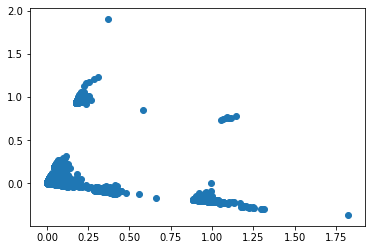

In [11]:
#Visualize the points on the orthogonal plot
%pylab inline
import matplotlib.pyplot as plt
figure()

plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'])

In [12]:
colors = {'T1':'r', 'T2':'b'}

How can we add color?

In [13]:
#Add a column to give colors base don the column you select
#Let us say, we would like to color the points based on the topic
df_lsa['Topic'].head()

13618    T1
4506     T2
15950    T2
1051     T2
3463     T1
Name: Topic, dtype: object

In [14]:
#Map the colors with column values
df_lsa['Topic'].apply(lambda x:colors[x]).head()

13618    r
4506     b
15950    b
1051     b
3463     r
Name: Topic, dtype: object

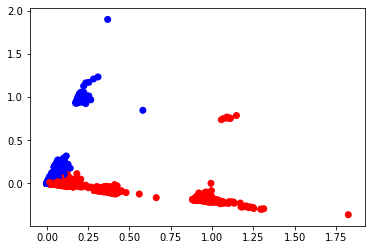

In [15]:
#Visualize the points on the orthogonal plot
#Now add color
colors = {'T1':'r', 'T2':'b'}
plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'], c=df_lsa['Topic'].apply(lambda x: colors[x]))

In [16]:
pd.crosstab(df_lsa.Topic, df_lsa.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Topic,,,,,,,,,,,,,,,
T1,177,216,205,201,243,241,238,224,255,251,279,212,229,139,144
T2,248,290,281,269,283,296,296,281,278,326,355,324,314,228,177


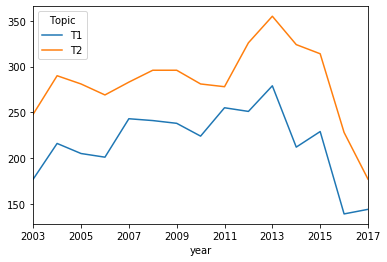

In [17]:
pd.crosstab(df_lsa.year,df_lsa.Topic).plot()

### Now try the topic modeling with TF_IDF

In [18]:
#Transform the data with TfIdf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataSample.headline_text.values)
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

10567
['jarryd', 'jarvis', 'jason', 'jay', 'jbs', 'jeffrey', 'jellyfish', 'jenkins', 'jennie', 'jennifer', 'jeopardises', 'jeopardy', 'jeou', 'jeremy', 'jericho', 'jerseys', 'jerusalem', 'jet', 'jets', 'jetstar', 'jetty', 'jewfish', 'ji', 'jibe', 'jigsaw', 'jihad', 'jihadists', 'jim', 'jinx', 'joan', 'joanna', 'job', 'jobless', 'jobs', 'joel', 'joh', 'johann', 'johansson', 'john', 'johnathan', 'johnny', 'johns', 'johnson', 'join', 'joins', 'joint', 'jolie', 'jolleys', 'jolt', 'jon', 'jonathan', 'jones', 'jong', 'jordan', 'josh', 'joshua', 'joughin', 'journalist', 'journalists', 'journey', 'joust', 'joy', 'joyce', 'joys', 'judas', 'judd', 'jude', 'judge', 'judges', 'judging', 'judgment', 'judicia', 'judiciary', 'julia', 'julian', 'julie', 'julius', 'july', 'jump', 'jumping', 'jumps', 'junction', 'june', 'jungle', 'junior', 'juntas', 'jupiter', 'jury', 'just', 'justice', 'justices', 'justification', 'justifies', 'justin', 'juve', 'juvenile', 'kacie', 'kafelnikov', 'kakadu', 'kakoschke']


In [19]:
#Topic modeling with SVD
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = pd.DataFrame(lsa.fit_transform(X.asfptype()), columns = ['C1', 'C2'])
dtm_lsa = dtm_lsa.replace(to_replace = np.nan, value = 0)  

In [20]:
dtm_lsa.head()

,C1,C2
0,0.018240,0.005370
1,0.035825,0.028974
2,0.007656,0.009592
3,0.014690,0.006953
4,0.528115,-0.069130


In [21]:
df_lsa = dataSample
df_lsa['Bow']=X
df_lsa['C1'] = dtm_lsa['C1']
df_lsa['C2'] = dtm_lsa['C2']
df_lsa['Topic'] = np.where(dtm_lsa['C1']>dtm_lsa['C2'], 'T1', 'T2')

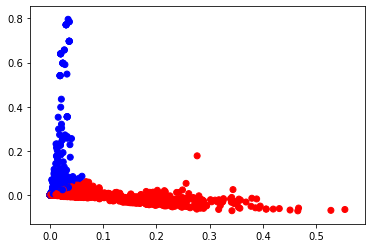

In [22]:
#Visualize the points on the orthogonal plot
# With color
colors = {'T1':'r', 'T2':'b'}
plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'], c=df_lsa['Topic'].apply(lambda x: colors[x]))

In [23]:
pd.crosstab(df_lsa.Topic, df_lsa.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Topic,,,,,,,,,,,,,,,
T1,337,392,380,362,411,418,399,386,419,405,449,379,404,275,235
T2,88,114,106,108,115,119,135,119,114,172,185,157,139,92,86


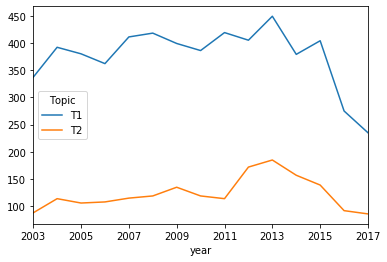

In [24]:
pd.crosstab(df_lsa.year,df_lsa.Topic).plot()

### Now do the clustering based on the components than the Bow/TF_IDF

In [25]:
#Get the data
df_lsa = df_lsa.replace(to_replace = np.nan, value = -99)  
X = df_lsa[['C1', 'C2']]

In [26]:
#Build the clusters
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
predictions = model.predict(X)

In [28]:
df_lsa['Segment']=predictions

In [29]:
df_lsa.head()

,Unnamed: 0,publish_date,headline_text,year,Bow,C1,C2,Topic,Segment
13618,749966,20121218,'roadmap' for domestic violence victims,2012,"(0, 8025)\t0.6170888291610249\n (0, 2939)\t...",-99.000000,-99.000000,T1,0
4506,605420,20110405,act govt welcomes jail audit,2011,"(0, 8025)\t0.6170888291610249\n (0, 2939)\t...",0.011905,-0.001069,T1,4
15950,900517,20140829,sustainability group warns against cutting,2014,"(0, 8025)\t0.6170888291610249\n (0, 2939)\t...",-99.000000,-99.000000,T2,0
1051,726491,20120921,anti bullying campaign attracts huge support,2012,"(0, 8025)\t0.6170888291610249\n (0, 2939)\t...",0.007871,0.014663,T1,4
3463,662710,20111228,police concerned over missing man,2011,"(0, 8025)\t0.6170888291610249\n (0, 2939)\t...",0.015302,0.010212,T1,4


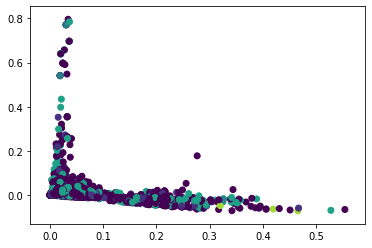

In [30]:
#Plot the components with segment colors
plt.scatter(dtm_lsa['C1'],dtm_lsa['C2'],c=df_lsa['Segment'])